# Naive Bayes

## Write your id numbers and names here


1.   208391037 - Nadav Arbel
2.   207060914 - Yuval Gorelik


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [69]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

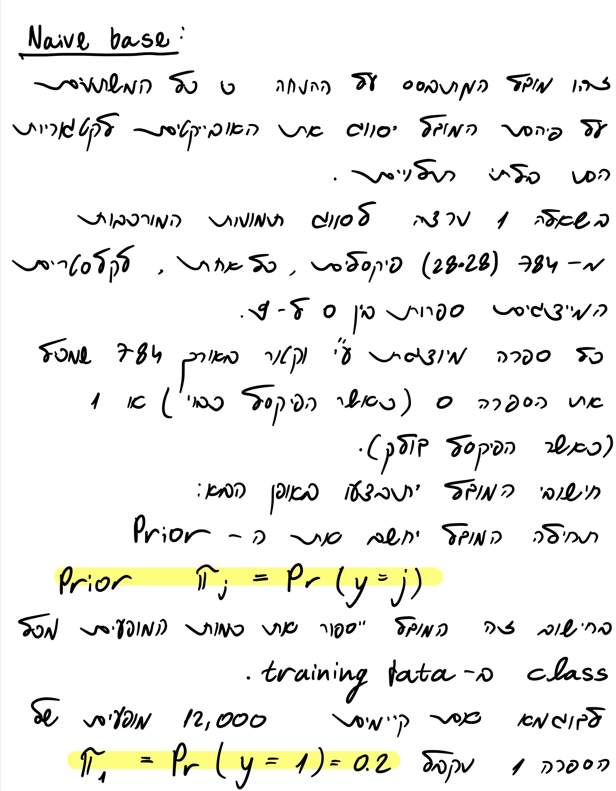

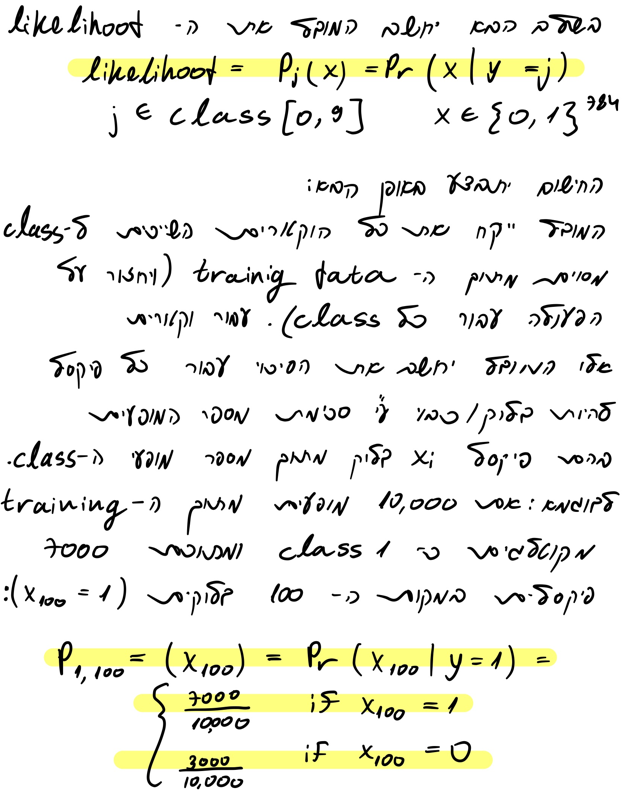

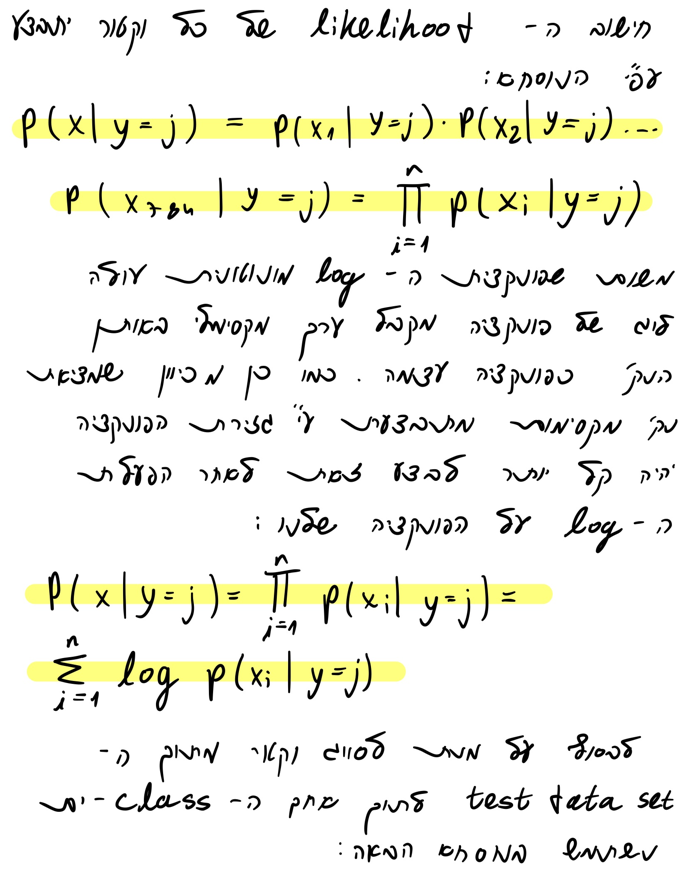

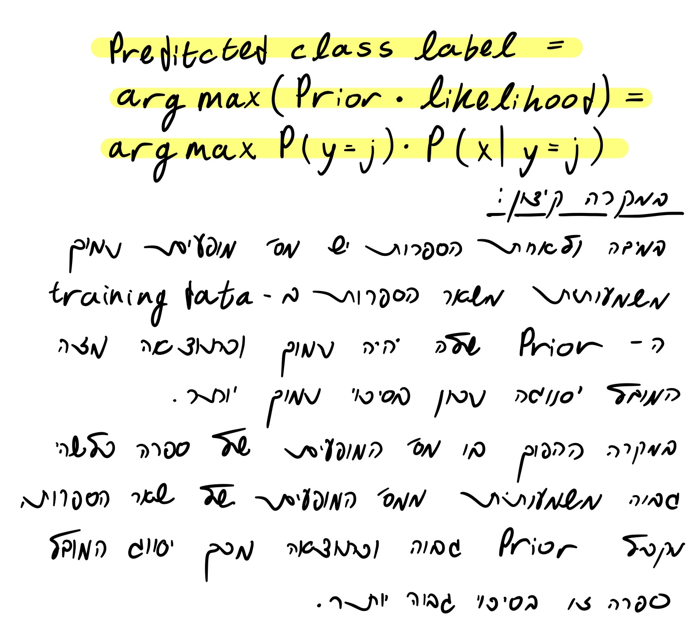

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

In [70]:
import numpy as np
import sklearn
from sklearn.naive_bayes import BernoulliNB
# setting up the model
clf = sklearn.naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
# fit
clf.fit(x_train, y_train)
# test
predictions = clf.predict(x_test)


The mean image of each class


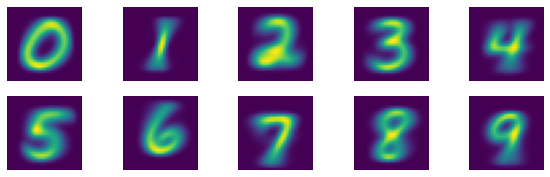

In [71]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
print("The mean image of each class")
plt.figure(figsize=(10,3))
for i in range(10):
    avgImg = np.average(x_train[y_train==i],0)
    plt.subplot(2, 5, i+1)
    plt.imshow(avgImg.reshape((28,28))) 
    plt.axis('off')

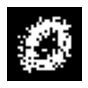

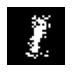

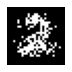

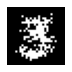

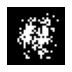

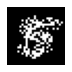

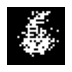

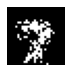

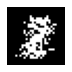

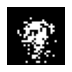

In [72]:
import math
log_prob_mat = clf.feature_log_prob_
# converting the log probability
for i in range(10):
  for j in range(len(log_prob_mat[i])):
    log_prob_mat[i][j] = math.exp(log_prob_mat[i][j])

# generating samples
gen_sample = []
class_sample = []
for i in range(10):
  for j in log_prob_mat[i]:
    gen_sample.append(np.random.choice(2, 1, p=[j, 1-j])[0])
  class_sample.append(np.array(gen_sample))
  gen_sample = []
# plot
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(2, 5, i+1)
  pyplot.imshow(class_sample[i].reshape(28,28), cmap=pyplot.get_cmap('binary'))
  plt.axis('off')
  pyplot.show()
  


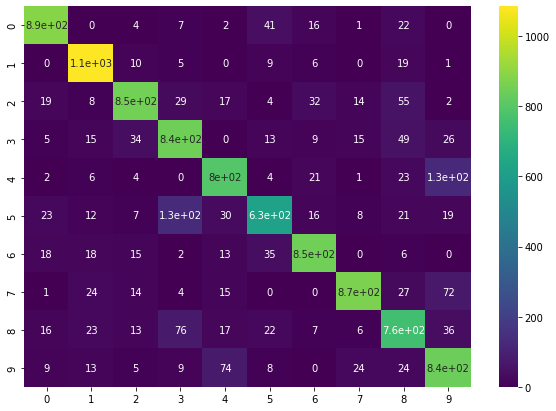

In [73]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# ploting the confusion matrix
array = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="viridis")

In [74]:
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
# calculaing the accuracy
score = (clf.score(x_test, y_test))
print("The accuracy rate is: {}".format(score))

The accuracy rate is: 0.8413


We can see that our model is quite accurate (84% accuracy). in the confusion matrix the values on the diagonal are very high as expected because the accuracy rate is relatively high.
another thing we noticed in the confusion matrix is that the model classifed a significant amount of samples wrong in similar digits like 5 as 3 and 4 as 9.

The way we think we should calculate the optimal threshold is by using cross validation: 
We will split our train data into k-folds, and in every iteration we will choose another threshold. After trying on the train data k differnt thersholds, we will choose the one which gave us the highest accuracy rate and use it for he test data hopefully the accuracy rate of our intire model will increase.


## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [75]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.validation import check_is_fitted
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# will be used in our NaiveBayes model we build
global dict



class NaiveBayes(BaseEstimator, ClassifierMixin):
  '''BaseEstimator and ClassifierMixin are imported from sklearn.base'''

  def fit(self, x, y):
    self.label_counter_words = [0 for i in range(20)] # total occurrences of all features in each label. 
    self.prior = [0 for i in range(20)] # creating prior vector
    x = x.toarray()
    self.likelihood = [[0 for i in range(len(x[0]))] for i in range(20)] # creating likelihood matrix
    for row in range(len(x)):
      self.prior[y[row]] += 1 # updating the count of how many docs in each label
      for col in range(len(x[row])):
        if x[row][col] > 0:
          self.label_counter_words[y[row]] += x[row][col] # updaing the count of words appeared in the label
          self.likelihood[y[row]][col] += x[row][col] # updaing the count of a word appeared in the label
    
    total_docs = sum(self.prior)
    for label in self.prior:
      label = label/total_docs # calculaing the prior value for each label

    for i in range(len(self.likelihood)):
      for j in range(len(self.likelihood[i])):
        self.likelihood[i][j] = self.likelihood[i][j]/self.label_counter_words[i] # calculaing the likelihood value for each word in each label


  def predict_log_proba(self, x):
    log_proba_per_label = []

    for i in range(20):
      log_proba = 0
      for w in range(len(x)): # x is a row of matrix with many words (as columns)
        if x[w] > 0:
          index_in_global_dict = self.key_list[self.value_list.index(w)] # getting the word from the test dict to check 
          if index_in_global_dict in dict: # if it exists in the global dict we create during the fit
            word_index = dict[index_in_global_dict]
            if self.likelihood[i][word_index] > 0:
              log_proba += math.log((self.prior[i]*self.likelihood[i][word_index]*x[w]), 10) # calculating the log probabilty
      log_proba_per_label.append(log_proba) # apeending to the list which will contain the log probabilty for the text in each class
    return log_proba_per_label




  def predict(self, x):
    x = x.toarray()
    predictions = [None for i in range(len(x))] # creating predictions vector
    self.test_dict = vectorizer.vocabulary_ # creating dict from test words, we will use it to find words in the likelihood matrix
    self.key_list = list(self.test_dict.keys())
    self.value_list = list(self.test_dict.values())
    for row in range(len(x)): # row = doc
      log_prob = self.predict_log_proba(x[row]) # sending each doc to predict_log_proba  
      predictions[row] = log_prob.index(max(log_prob)) # choosing the label according to he results we got from the predict_log_proba
    return predictions




In [76]:
# loading train data
newsgroups_train = fetch_20newsgroups(subset='train', remove= ('headers', 'footers', 'quotes'))
# setting the CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english', min_df=0.008, max_df=0.03)
# setting the pipeline
pipe = Pipeline([('vector', vectorizer),('naive', NaiveBayes())])
# fit
pipe.fit(newsgroups_train['data'], newsgroups_train['target'])
# insert the dict {word:index} so we will be able to find a word's index in the likelihood matrix
dict = vectorizer.vocabulary_



In [77]:
# loading train data
newsgroups_test = fetch_20newsgroups(subset='test', remove= ('headers', 'footers', 'quotes'))
# predict
label_ped = pipe.predict(newsgroups_test['data'])

In [78]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
real_labels = newsgroups_test['target']

print("classification report:")
print(classification_report(real_labels, label_ped))
score = accuracy_score(real_labels, label_ped)
print("The accuracy rate is: {}".format(score))


classification report:
              precision    recall  f1-score   support

           0       0.13      0.26      0.17       319
           1       0.46      0.46      0.46       389
           2       0.39      0.30      0.34       394
           3       0.43      0.40      0.41       392
           4       0.43      0.46      0.44       385
           5       0.56      0.47      0.51       395
           6       0.61      0.66      0.63       390
           7       0.37      0.52      0.44       396
           8       0.41      0.51      0.45       398
           9       0.36      0.58      0.45       397
          10       0.66      0.41      0.50       399
          11       0.66      0.45      0.54       396
          12       0.32      0.33      0.33       393
          13       0.56      0.51      0.53       396
          14       0.52      0.35      0.42       394
          15       0.40      0.73      0.52       398
          16       0.44      0.38      0.41       364
    

In [79]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
pipe = Pipeline([('vector', vectorizer),('MultinomialNB', clf)])
pipe.fit(newsgroups_train['data'], newsgroups_train['target'])
label_ped = pipe.predict(newsgroups_test['data'])
print("classification report:")
print(classification_report(real_labels, label_ped))

score = accuracy_score(real_labels, label_ped)
print("The accuracy rate is: {}".format(score))


classification report:
              precision    recall  f1-score   support

           0       0.30      0.36      0.33       319
           1       0.49      0.52      0.50       389
           2       0.46      0.33      0.38       394
           3       0.47      0.44      0.46       392
           4       0.48      0.51      0.49       385
           5       0.63      0.53      0.58       395
           6       0.69      0.68      0.68       390
           7       0.47      0.54      0.50       396
           8       0.51      0.50      0.51       398
           9       0.54      0.60      0.57       397
          10       0.33      0.55      0.41       399
          11       0.67      0.53      0.59       396
          12       0.37      0.37      0.37       393
          13       0.59      0.55      0.57       396
          14       0.53      0.41      0.46       394
          15       0.52      0.63      0.57       398
          16       0.46      0.47      0.46       364
    

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=3000)
pipe = Pipeline([('vector', vectorizer),('MultinomialNB', MultinomialNB())])
pipe.fit(newsgroups_train['data'], newsgroups_train['target'])
label_ped = pipe.predict(newsgroups_test['data'])
print("classification report:")
print(classification_report(real_labels, label_ped))

score = accuracy_score(real_labels, label_ped)
print("The accuracy rate is: {}".format(score))

classification report:
              precision    recall  f1-score   support

           0       0.51      0.33      0.40       319
           1       0.54      0.63      0.58       389
           2       0.58      0.59      0.59       394
           3       0.55      0.62      0.58       392
           4       0.64      0.56      0.60       385
           5       0.73      0.69      0.71       395
           6       0.72      0.77      0.74       390
           7       0.68      0.65      0.67       396
           8       0.70      0.67      0.69       398
           9       0.72      0.75      0.73       397
          10       0.52      0.85      0.64       399
          11       0.77      0.66      0.71       396
          12       0.59      0.47      0.53       393
          13       0.72      0.64      0.68       396
          14       0.71      0.64      0.67       394
          15       0.45      0.83      0.58       398
          16       0.52      0.65      0.58       364
    

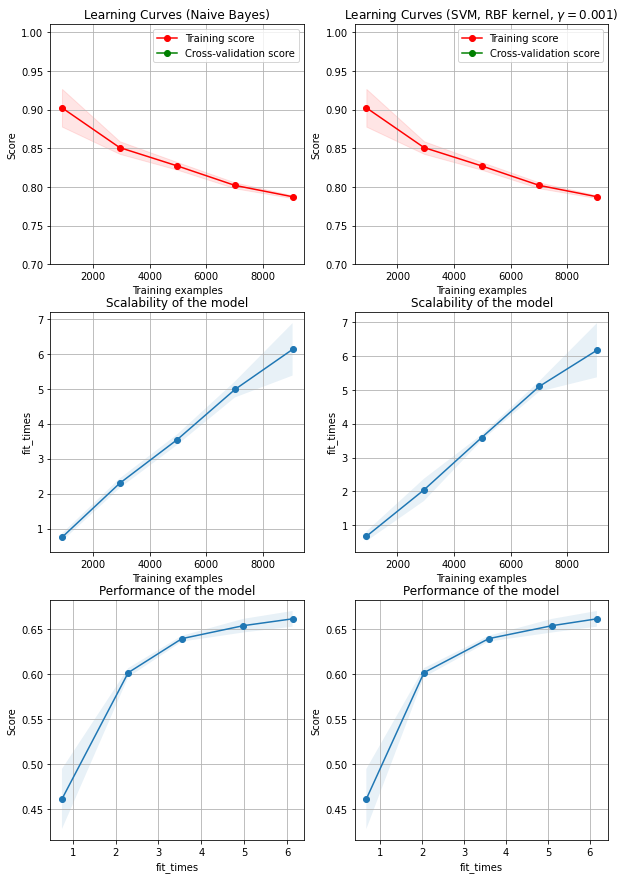

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = newsgroups_train['data'], newsgroups_train['target']

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = pipe
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = pipe
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()


### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [82]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [83]:
# Implementationn for 1st bonus
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import sklearn
import numpy as np

clf = MultinomialNB()
vectorizer = CountVectorizer(stop_words = 'english', min_df=0.008, max_df=0.03)
pipe = Pipeline([('vector', vectorizer),('MultinomialNB', clf)])
pipe.fit(newsgroups_train['data'], newsgroups_train['target'])
label_ped = pipe.predict(list(newsgroups_test['data']))
real_labels = newsgroups_test['target']

def p_c_given_xi(model):
  prior_class = np.exp(model.class_log_prior_)
  likelihood = np.exp(model.feature_log_prob_)
  sol = prior_class.reshape(-1,1)* likelihood
  sol = sol/sol.sum(axis=0)
  return sol

sol = p_c_given_xi(clf)

In [84]:
newsgroups_test = fetch_20newsgroups(subset='test', remove= ('headers', 'footers', 'quotes'))
X_test = newsgroups_test['data']
x = vectorizer.transform(X_test)
idx2word={v:k for k, v in vectorizer.vocabulary_.items()}
cold_color='\x1b[41;37m{}\x1b[0m'
hot_color='\x1b[42;37m{}\x1b[0m'
mid_color='\x1b[45;37m{}\x1b[0m' 
def word_by_score(c, word_index, min_p=0.1, max_n=10):
  word_score = sol[c, word_index]
  words =[idx2word[w] for w in word_index]
  s = pd.Series(word_score.flatten(), index=[words, word_index])
  s.index.names=['word','idx']
  s.name = 'score'
  stop = s.sort_values(ascending=False)
  stop = stop[stop>min_p]
  if len(stop)>max_n:
    stop = stop[:max_n]
  return stop.reset_index()

In [85]:
def display_doc(i):
  """
  displaying document i
  """
  label_ped = pipe.predict(list(newsgroups_test['data']))
  pred = label_ped
  c_hat = pred[i]
  c = y_test[i]
  txt = X_test[i]
  xi = x[i,:]
  nz = xi.nonzero()[1] # non zero words

  print('')
  target_names = newsgroups_test['target_names']
  print('checked document: {}, was it correct? {}'.format(i, c_hat==c))
  print('-'*80)
  #print('document={}, c={} ({}), guess correctly = {}'.format(i, c, target_names[c], c_hat==c))
  print('-'*80)
  print('the document was assigned to "{}" category'.format(target_names[c]))
  print('-'*80)
  hot = word_by_score(c,nz)
  print(hot)
  hot_words = hot.word.tolist()
  if c_hat!=c:
    print('-'*80)
    #print('score for incorrect guess c_hat={} ({})'.format(c_hat, target_names[c_hat]))
    print('the document was assigned to "{}" category'.format(target_names[c_hat]))
    print('-'*80)
    cold = word_by_score(c_hat,nz)
    cold_words = cold.word.tolist()
    print(cold)
  else:
    cold_words = []
  print('-'*80)
  print('text:')
  print('-'*80)
  print_txt(txt, hot_words, cold_words)

In [86]:
i = 3
display_doc(i)


checked document: 3, was it correct? False
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
the document was assigned to "alt.atheism" category
--------------------------------------------------------------------------------
        word   idx     score
0  religious   961  0.415223
1   religion   960  0.410347
2       evil   435  0.212939
3     nature   766  0.195264
4       rule  1000  0.149590
5    killing   635  0.145930
6      human   578  0.138073
7      women  1253  0.130731
8      worse  1259  0.124518
9      basis   154  0.119239
--------------------------------------------------------------------------------
the document was assigned to "talk.politics.mideast" category
--------------------------------------------------------------------------------
        word   idx     score
0     killed   634  0.395375
1      women  1253  0.250324
2  political   861  0.248113
3 

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer for 2nd bonus

In order to correct the analyzed error we can use Local Gradient Explanation Vector. This method is able to explain the local decision taken by nonlinear classification algorithms, using the local gradients that characterize how a data point has to be moved to change its predicted label.

Intuitively, a feature has a lot of influence on the model decision if small variations in its value cause large variations of the model’s output, while a feature has little influence on the prediction if big changes in that variable barely affect the model’s output.

Since a model is a scalar function, its gradient points in the direction of the greatest rate of increase of the model’s output, so it can be used as a measure of features’ influence.

We can use the above to correct the analyzed error by using the gradient output and than changing a specific feature's influence accordingly.

link to an article we used (in adition to those provided): [Understanding how to explain predictions with “explanation vectors”](https://towardsdatascience.com/understanding-how-to-explain-predictions-with-explanation-vectors-15e31e32bfc3)